# Assignment 7: Morphology algorithms in image processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
from PIL import Image
import cv2
from skimage.filters import threshold_otsu
from scipy.ndimage import binary_fill_holes
from scipy.ndimage import binary_hit_or_miss
from skimage.morphology import skeletonize

### 1. Morphology Algorithms
##### 1.1. Boundary Extraction
##### Implement the boundary extraction using the image “boundary.png”. To remind, boundary extraction defines the boundary of an image by first eroding the object with a structuring element and then subtracting the result from the original image. Visualize the result. 
##### $A - (A⊖B)$

In [2]:
#Load image
image_bound = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 7 - IP\\IP5\\IP5\\boundary.png").convert('L')

#To array
image_array_bound = np.array(image_bound)

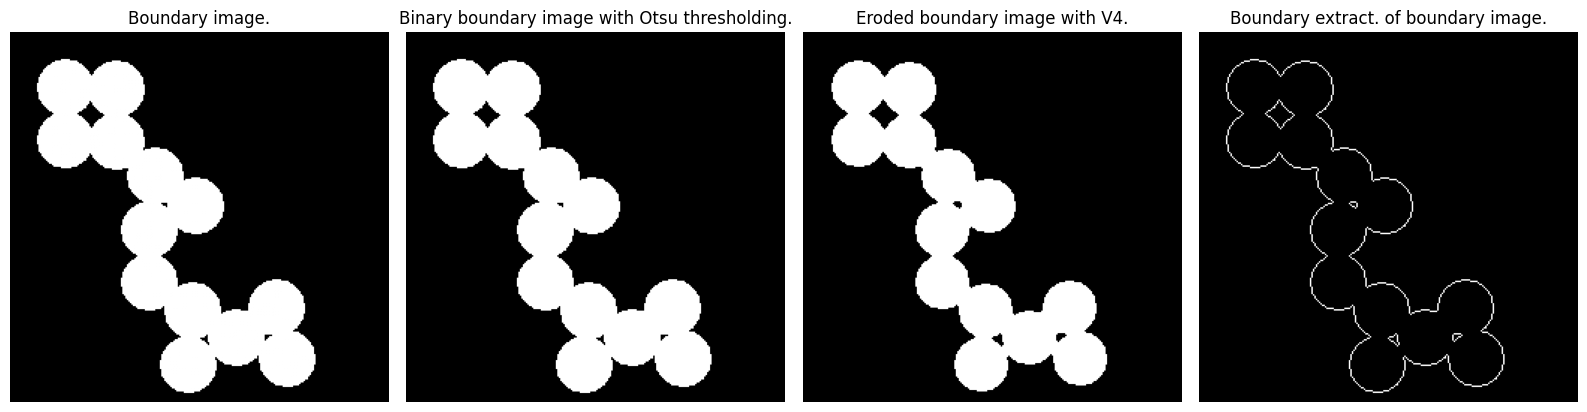

In [3]:
#Function for Otsu thresholding
def otsu_method(img):
    otsu_threshold = threshold_otsu(img)
    #Binarization
    binary_image = (img > otsu_threshold).astype(np.uint8)
    return binary_image, otsu_threshold

#Binarization
binary_image_bound, otsu_threshold_bound = otsu_method(image_array_bound)

#Erosion through V4 structuring element (A⊖B)
struct_el_v4 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
eroded_v4_bound = cv2.erode(binary_image_bound, struct_el_v4, iterations=1) #1 iteration

#Boundary extraction: A-(A⊖B)
boundary_extr = binary_image_bound - eroded_v4_bound

#Plot
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

#Original image
ax[0].imshow(image_bound, cmap='gray', norm=NoNorm())
ax[0].set_title("Boundary image.")
ax[0].axis('off')

#Otsu binarization
ax[1].imshow(binary_image_bound, cmap='gray')
ax[1].set_title("Binary boundary image with Otsu thresholding.")
ax[1].axis('off')

#Eroded image
ax[2].imshow(eroded_v4_bound, cmap='gray')
ax[2].set_title("Eroded boundary image with V4.")
ax[2].axis('off')

#Boundary extraction
ax[3].imshow(boundary_extr, cmap='gray')
ax[3].set_title("Boundary extract. of boundary image.")
ax[3].axis('off')

plt.tight_layout()
plt.show()

##### 1.2. Region Filling
##### Using the image “coins”, fill holes in the binary image and display the result. Try to do the same on the gray level image.

(-0.5, 299.5, 245.5, -0.5)

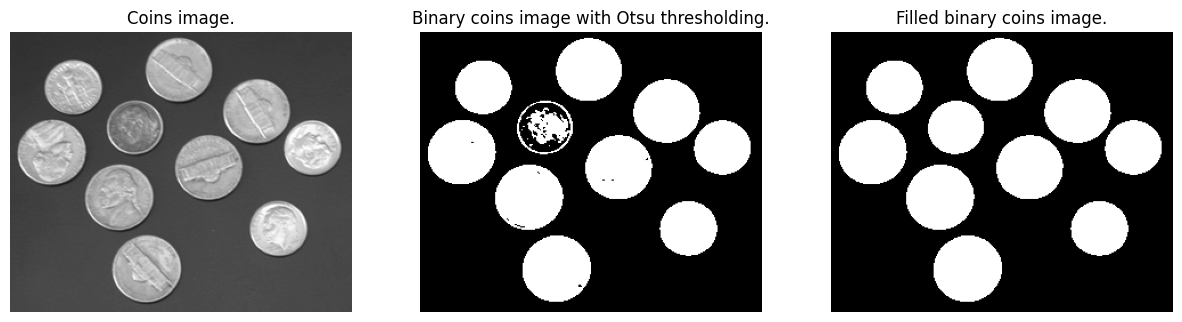

In [4]:
#Load image
image_coins = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 5 - IP\\IP5_v2\\IP5_v2\\coins.bmp").convert('L')

#To array
image_array_coins = np.array(image_coins)

#Binarization
binary_image_coins, otsu_threshold_coins = otsu_method(image_array_coins)

#Filling holes in the binary image
filled_binary_coins = binary_fill_holes(binary_image_coins).astype(np.uint8)

#Plot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

#Original image
ax[0].imshow(image_coins, cmap='gray', norm=NoNorm())
ax[0].set_title("Coins image.")
ax[0].axis('off')

#Otsu binarization
ax[1].imshow(binary_image_coins, cmap='gray')
ax[1].set_title("Binary coins image with Otsu thresholding.")
ax[1].axis('off')

#Eroded image
ax[2].imshow(filled_binary_coins, cmap='gray')
ax[2].set_title("Filled binary coins image.")
ax[2].axis('off')

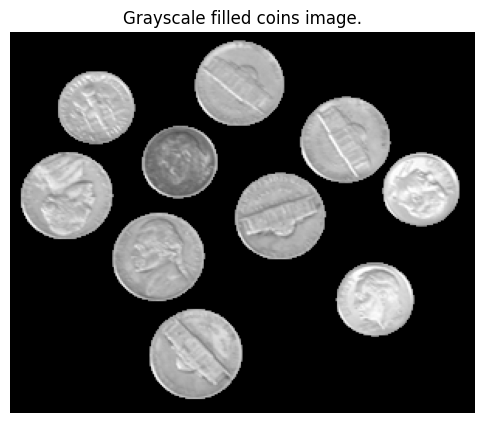

In [ ]:
#Filling holes in the gray binary image
#filled_binary_coins is like a mask to fill the holes in the binary one
#Now we apply the mask to the gray level image
grayscale_filled_coins = image_array_coins * filled_binary_coins

#Plot
plt.figure(figsize=(6, 6))
plt.imshow(grayscale_filled_coins, cmap='gray')
plt.title("Grayscale filled coins image.")
plt.axis('off')
plt.show()

##### 1.3. Hit-and-miss Transformation
##### The hit-and-miss transform is a general binary morphological operation that can be used to look for particular patterns of foreground and background pixels in an image. Using the image “text”, apply the hit-and-miss transformation “skimage.morphology.binary_hit_or_miss” to detect a target shape in a string of text. The aim is to identify the letter ‘e’ in a text.

In [12]:
#Load image
image_text = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 7 - IP\\IP5\\IP5\\text.png").convert('L')

#To array
image_array_text = np.array(image_text)

#Binarization
binary_image_text, otsu_threshold_text = otsu_method(image_array_text)

#Dimensions
binary_image_text.shape

(248, 257)

In [ ]:
#To look entirely at the array of text image, we use this method:
np.set_printoptions(threshold=np.inf)
#Print entirely the array
print(binary_image_text)
#After the visualization, set again the default-previous one
np.set_printoptions(threshold=1000)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0

In [28]:
#Loading the image founded by cutting the area of letter 'e' in the original one
image_e = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 7 - IP\\IP5\\IP5\\e.png").convert('L')

#To array
image_array_e = np.array(image_e)

#Binarization
binary_image_e, otsu_threshold_e= otsu_method(image_array_e)

#Dimensions
binary_image_e.shape

(11, 9)

In [29]:
#Visualization of the entire array to build the structuring element
np.set_printoptions(threshold=np.inf)
print(binary_image_e)
#Back to default set
np.set_printoptions(threshold=1000)

[[0 0 0 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 0]
 [0 1 1 0 0 0 1 1 1]
 [1 1 1 0 0 0 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0]
 [0 1 1 1 0 0 1 1 1]
 [0 1 1 1 1 1 1 1 0]
 [0 0 0 1 1 1 1 0 0]]


In [30]:
#Strurturing element for letter 'e' is our image array 'e'
#Strurturing element for letter 'e' rotated of 90°
structuring_element_transpose = np.transpose(binary_image_e)[::-1]

#Hit-or-miss with both the structuring elements
hit_original = binary_hit_or_miss(binary_image_text, structure1=binary_image_e)
hit_transposed = binary_hit_or_miss(binary_image_text, structure1=structuring_element_transpose)

#Combining the results through the logical OR
hit_or_miss_text = hit_original | hit_transposed

hit_or_miss_text

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

(-0.5, 256.5, 247.5, -0.5)

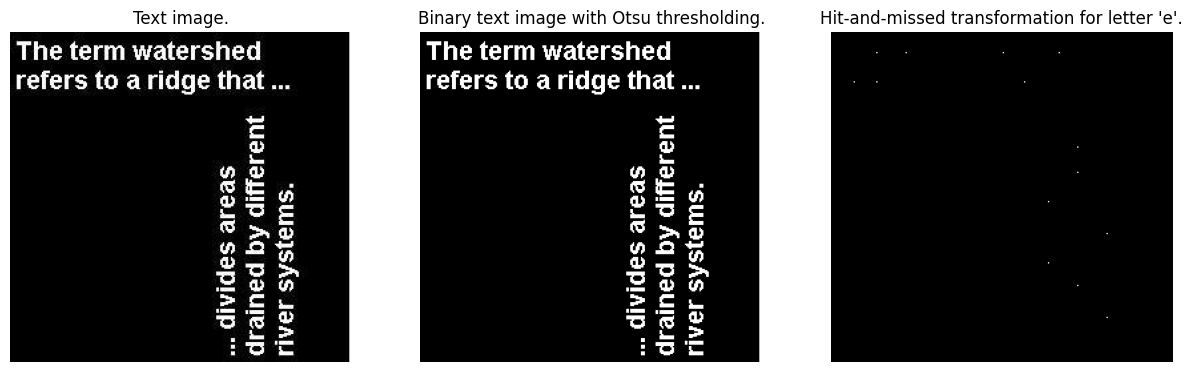

In [31]:
#Plot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

#Original image
ax[0].imshow(image_text, cmap='gray', norm=NoNorm())
ax[0].set_title("Text image.")
ax[0].axis('off')

#Otsu binarization
ax[1].imshow(binary_image_text, cmap='gray')
ax[1].set_title("Binary text image with Otsu thresholding.")
ax[1].axis('off')

#Hit-and-miss transformation
ax[2].imshow(hit_or_miss_text, cmap='gray')
ax[2].set_title("Hit-and-missed transformation for letter 'e'.")
ax[2].axis('off')

##### 1.4. Morphological Skeletons
##### The skeleton of a binary image is a representation of the basic form of the object in the image. In other words, it has been reduced down to its minimal level. Image ‘skeletons’ illustrates different shapes. Consider the function “bwmorph”, calculate their corresponding skeletons.

(-0.5, 683.5, 228.5, -0.5)

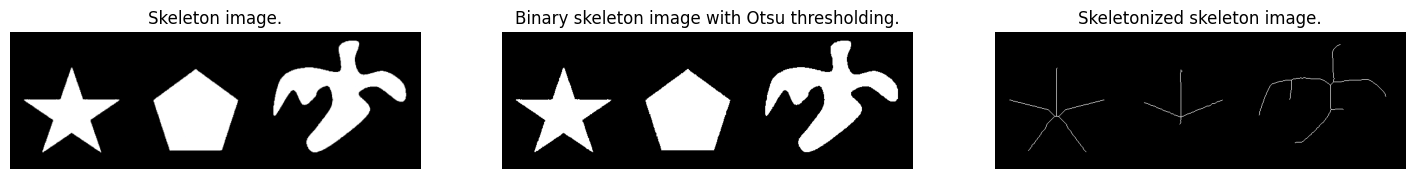

In [ ]:
image_skeleton = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 7 - IP\\IP5\\IP5\\skeleton.png").convert('L')

#To array
image_array_skeleton = np.array(image_skeleton)

#Binarization
binary_image_skeleton, otsu_threshold_skeleton= otsu_method(image_array_skeleton)

#Skeletonizing the binary image
binary_image_skeleton = binary_image_skeleton.astype(bool) #Image with values True/False
skeletonized_image = skeletonize(binary_image_skeleton)

#Plot
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

#Original image
ax[0].imshow(image_skeleton, cmap='gray', norm=NoNorm())
ax[0].set_title("Skeleton image.")
ax[0].axis('off')

#Otsu binarization
ax[1].imshow(binary_image_skeleton, cmap='gray')
ax[1].set_title("Binary skeleton image with Otsu thresholding.")
ax[1].axis('off')

#Skeletonized image
ax[2].imshow(skeletonized_image, cmap='gray')
ax[2].set_title("Skeletonized skeleton image.")
ax[2].axis('off')